In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [57]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv")
df = pd.read_csv(data_path)

In [58]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [60]:
df.describe()

,age,division,official,overall,pace,genderdiv
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000
mean,41.638332,1100.967025,208.159470,8429.373422,7.947398,4351.684732
std,10.351311,942.114816,23.743608,5052.024116,0.905739,2772.398239
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,363.000000,191.727500,4061.750000,7.320000,2032.750000
50%,42.000000,842.000000,209.225000,8247.500000,7.980000,4113.500000
75%,49.000000,1560.000000,225.230000,12662.250000,8.600000,6316.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


In [61]:
df.isnull()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


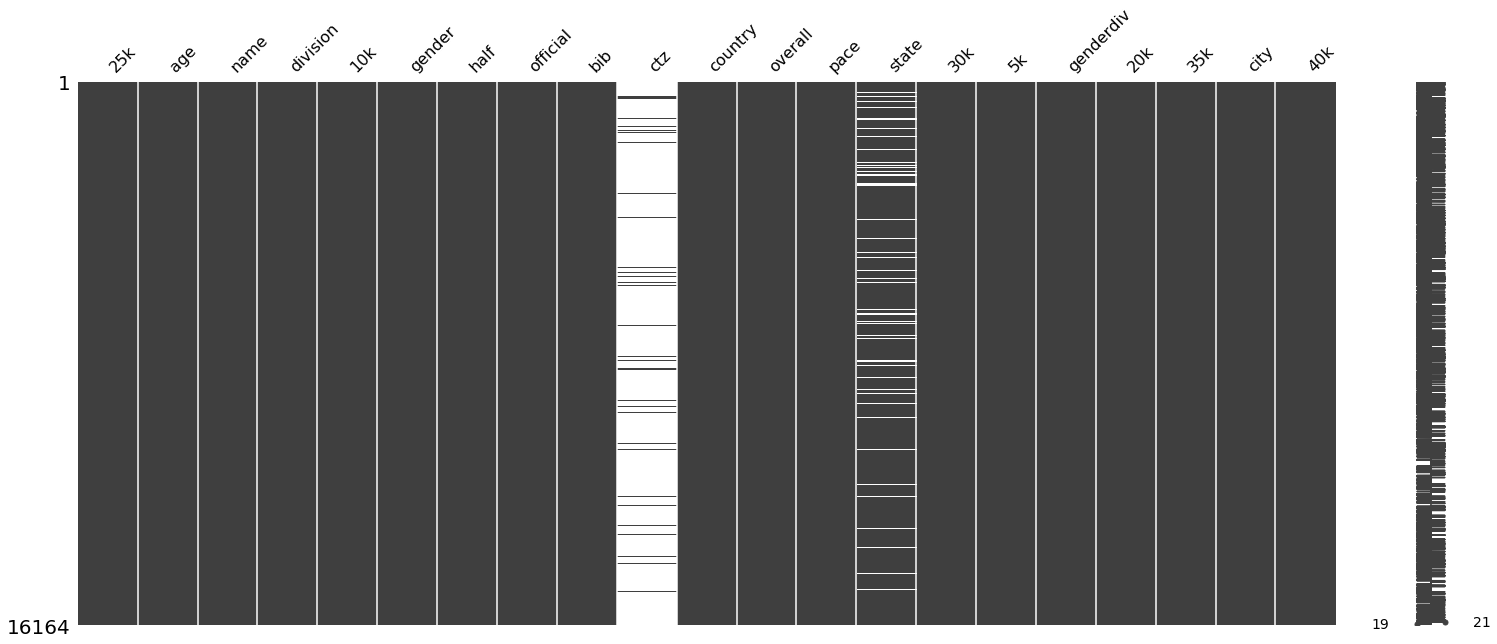

In [62]:
import missingno as msno
#missing values
df.isnull().sum()*100/df.isnull().count()

# Create nullity matrix for missing values 

msno.matrix(df)

In [63]:
df.isnull().sum()*100/df.isnull().count()

25k           0.000000
age           0.000000
name          0.000000
division      0.000000
10k           0.000000
gender        0.000000
half          0.000000
official      0.000000
bib           0.000000
ctz          95.316753
country       0.000000
overall       0.000000
pace          0.000000
state         9.050977
30k           0.000000
5k            0.000000
genderdiv     0.000000
20k           0.000000
35k           0.000000
city          0.006187
40k           0.000000
dtype: float64

In [64]:
df.drop(('ctz'), axis =1, inplace=True)


In [65]:
df.state.fillna(('other'),inplace=True) 

In [66]:
df.isnull().sum()*100/df.isnull().count()

25k          0.000000
age          0.000000
name         0.000000
division     0.000000
10k          0.000000
gender       0.000000
half         0.000000
official     0.000000
bib          0.000000
country      0.000000
overall      0.000000
pace         0.000000
state        0.000000
30k          0.000000
5k           0.000000
genderdiv    0.000000
20k          0.000000
35k          0.000000
city         0.006187
40k          0.000000
dtype: float64

In [67]:
df[df.isnull().any(axis=1)]

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
10138,122.20,51,"Vinarnic, Pascal",1152,48.23,M,102.47,222.58,12330,ARG,11978,8.5,other,149.82,24.15,8194,97.05,179.77,NaN,208.93


In [68]:
df.loc[df['country'] == 'ARG']

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
1991,103.02,36,"Mucchiut, Gabriel Sr.",1410,40.75,M,86.63,179.97,2462,ARG,2093,6.87,other,124.68,20.43,1960,82.18,147.43,Buenos Aires,169.95
4679,105.72,35,"Ramoneda, Igor",1412,42.38,M,89.32,179.98,5673,ARG,2095,6.87,other,127.03,21.30,1962,84.73,148.72,Buenos Aires,170.45
6649,114.23,44,"Vincent, Esteban P.",1134,43.58,M,95.28,204.50,8048,ARG,6983,7.80,other,139.85,21.53,5734,90.00,166.67,Buenos Aires,192.83
7290,116.70,31,"Blanco, Anabella",1637,44.48,F,96.52,211.87,8836,ARG,8962,8.08,other,142.70,22.12,2126,91.43,170.53,Ciudad Autonoma De Buenos Aires,198.73
7716,108.95,51,"Marino, Fernando P. Sr.",604,42.25,M,90.52,205.98,9343,ARG,7364,7.87,other,134.68,21.02,5962,85.90,165.02,La Plata,194.02
8819,114.88,35,"Delieutraz, Ana F.",967,45.25,F,96.30,204.02,10714,ARG,6841,7.78,other,140.65,22.80,1195,91.18,166.43,Buenos Aires,192.20
8901,112.30,48,"Aizpun, Adrian M.",428,45.57,M,95.05,191.73,10810,ARG,4063,7.32,other,135.15,23.02,3683,90.25,158.15,Mar Del Plata,181.15
9026,113.47,40,"Bonzi, Soledad",48,44.87,F,95.53,195.12,10965,ARG,4752,7.45,other,136.78,22.30,530,90.53,160.72,Salta,184.50
9876,125.57,58,"Moreno, Eduardo",424,49.83,M,105.63,217.57,11985,ARG,10530,8.30,other,151.08,25.97,7558,98.90,177.72,Mendoza,204.70
9998,148.30,57,"Rodriguez, Alejandro Sr.",988,55.38,M,122.75,264.45,12152,ARG,17538,10.10,other,181.80,27.05,10599,116.00,216.18,Mendoza,249.97


In [55]:
df["city"] = df.groupby("country").apply(lambda x: x.fillna(x.mode()))

In [56]:
df.loc[df['name'] == 'Vinarnic, Pascal']

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
10138,122.20,51,"Vinarnic, Pascal",1152,48.23,M,102.47,222.58,12330,ARG,11978,8.5,other,149.82,24.15,8194,97.05,179.77,122.20,208.93


In [43]:
df.city

0         49.87
1         77.27
2         77.23
3         50.50
4         48.75
5         77.25
6         50.50
7         77.23
8         52.62
9         77.25
10        77.25
11        48.75
12        52.62
13        48.75
14        77.25
15        52.63
16        52.63
17        53.07
18        55.60
19        49.87
20        50.50
21        77.80
22        53.08
23        77.28
24        58.33
25        77.60
26        56.05
27        55.60
28        77.15
29        59.55
          ...  
16134    135.43
16135    143.08
16136    142.55
16137    131.87
16138    135.12
16139    141.67
16140    144.70
16141    140.17
16142    143.55
16143    134.98
16144    137.72
16145    134.52
16146    136.77
16147    142.00
16148    141.97
16149    140.37
16150    139.62
16151    136.72
16152    137.85
16153    135.77
16154    138.90
16155    144.27
16156    140.02
16157    141.08
16158    138.17
16159    144.85
16160    133.32
16161    139.83
16162    135.38
16163    144.95
Name: city, Length: 1616